# Classification

In this lab we would be going through:
- Logistic Regression
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis

For this lab, we would examining the `Smarket` data set that contains a number of numeric variables plus a variable called `Direction` which has the two labels `Up` and `Down`. 

Our goal is to predict `Direction` using the other features

In [1]:
library(ISLR2)

#understanding Smarket data set
names(Smarket) #columns of the data set
dim(Smarket) #dimension of the data set
summary(Smarket) 

# attach the data set to use the columns directly
attach(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

[1] 1250    9

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

## Logistic Regression

We are using the `glm()` function (it can be used to fit many types of generalized liner models) to fit a logistic regression model in order to predict `Direction` using `Lag1` - `Lag5` and `Volume`.

We need to pass in the argument `family = binomial` to `glm()` in order run logistic regression model rather than some other type of generalized linear model.

In [2]:
glm.fits = glm(
Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial)

summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


The smallest p-value here is associated with `Lag1`( `0.15` although a relatively large) and the negative coefficient suggests that if the market had a positive return yesterday, then it is less likely to go up today.

The `predict()` function can be used to predict the probability that the market will go up, given values of the predictors. The `type = "response"` option tells `R` to output probabilities of the form `P(Y = 1|X)`, as opposed to other information such as the logit.

If no data set is supplied to the `predict()` function, then the probabilities are computed for the training data that was used to fit the logistic regression model.

In [3]:
glm.probs <- predict(glm.fits, type = "response")
glm.probs[1:10]
contrasts(Direction)

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

,Up
Down,0
Up,1


In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, `Up` or `Down`.

The following two commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than `0.5`

In [4]:
glm.pred <- rep("Down", 1250)
glm.pred[glm.probs > .5] = "Up"

table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [5]:
mean(glm.pred == Direction)

[1] 0.5216

The `mean()` function can be used to compute the fraction of days for which the prediction was correct. In this case, logistic regression correctly predicted the movement of the market `52.2 %` of the time.

As we have seen previously, the training error rate is often overly optimistic—it tends to underestimate the test error rate. In order to better assess the accuracy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data.

In [6]:
train <- (Year < 2005)

# Test data
Smarket.test <- Smarket[!train, ]
dim(Smarket.test)

#Train data
Smarket.train = Smarket[train, ]
dim(Smarket.train)

Direction.2005 = Direction[!train]

[1] 252   9

[1] 998   9

To fit the model using only the subset of the observations we can pass the `subset` argument to the `glm()` function along side other arguments  

In [7]:
#Return a logistic regression model over the training subset of data
#Response: Direction; Predictors: Lag1, Lag2
Smarket.train.fit = function(){
    # your code here
    glm.fit <- glm(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 2005, family = binomial)
    return(glm.fit)
}

#Return the predicted probabilities object based on training fit over test data set 
Smarket.test.predict = function(){
    # your code here
    glm.fit <- Smarket.train.fit()  # Fit the logistic regression model using the training subset
    glm.probs <- predict(glm.fit, newdata = Smarket[Year >= 2005, ], type = "response")
    return(glm.probs)

}

In [8]:
fit = Smarket.train.fit()
coefficients = coef(fit)

#Test intercepts of the fit
stopifnot(round(coefficients['(Intercept)'],2)== 0.03)
stopifnot(round(coefficients['Lag1'],2)== -0.06)
stopifnot(round(coefficients['Lag2'],2)== -0.04)

In [9]:
predict = Smarket.test.predict()

glm.pred = rep('Down', 252)
glm.pred[predict > .5] = 'Up'

#Test mean of prediction
stopifnot(round(mean(glm.pred == Direction.2005), 2) == 0.56)
stopifnot(round(mean(glm.pred != Direction.2005), 2) == 0.44)

## Linear Discriminant Analysis

For this, we would be using `lda()` function which is a part of `MASS` library.

In [10]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:ISLR2’:

    Boston




Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

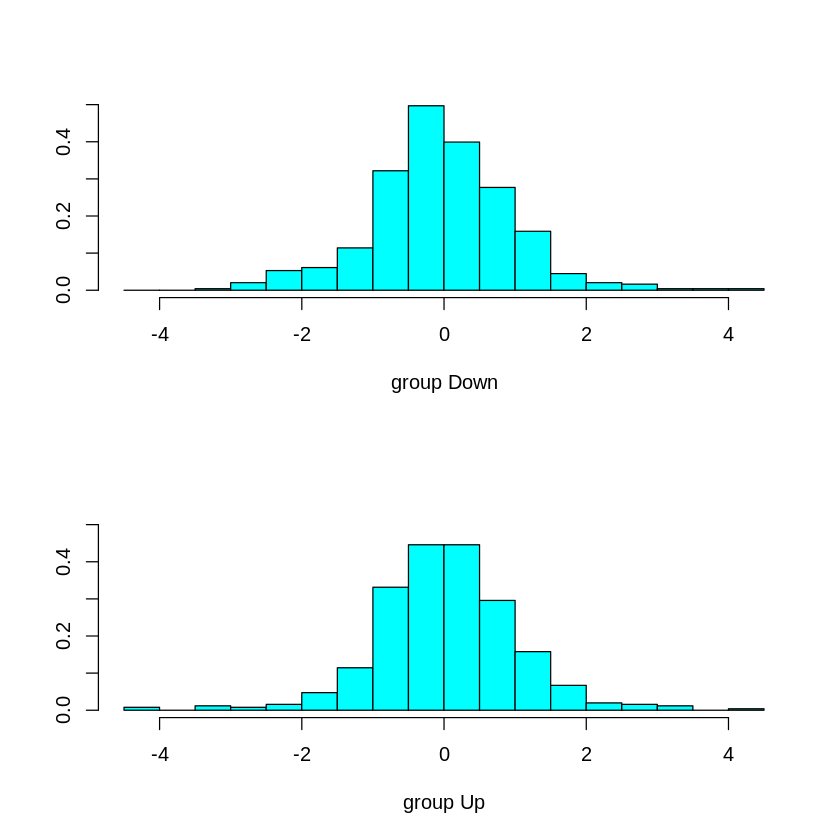

In [11]:
lda.fit = lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)
lda.fit

plot(lda.fit)

The `plot()` function produces plots of the linear discriminants, obtained by computing −0.642 × `Lag1` − 0.514 × `Lag2` for each of the training obser- vations. The `Up` and `Down` observations are displayed separately

In [12]:
#predict Direction based on the test data
lda.pred = predict(lda.fit, Smarket.test)
names(lda.pred)

[1] "class"     "posterior" "x"

`predict()` function returns a list with three elements. 
- The first element, `class`, contains LDA’s predictions about the movement of the market.
- The second element, `posterior`, is a matrix whose `kth` column contains the posterior probability that the corresponding observation belongs to the `kth` class
- Finally, `x` contains the linear discriminants, described earlier.

In [13]:
lda.class = lda.pred$class
table(lda.class, Direction.2005)
mean(lda.class == Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

Applying a 50 % threshold to the posterior probabilities allows us to recre- ate the predictions contained in `lda.pred$class`.

## Quadratic Discriminant Analysis

The syntax of `qda()` is identical to that of an `lda()`
The `predict()` function also works in the same fashion as for `lda()`

In [14]:
#Return the fit using the training subset of data 
#Response: Direction; Predictors: Lag1, Lag2
qda.fit = function(){
    # your code here
    qda.model <- qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 2005)
    return(qda.model)
    
}
names(qda.fit()) #variables of the object 

[1] "prior"   "counts"  "means"   "scaling" "ldet"    "lev"     "N"      
 [8] "call"    "terms"   "xlevels"

In [15]:
#Test - Count of predictions
stopifnot(qda.fit()$counts['Down'] == 491)
stopifnot(qda.fit()$counts['Up'] == 507)

#to understand more about qda() and output values 
#?qda()

In [16]:
#Return the predicted class by fitting the data over Smarket.test
qda.predict.class = function(){
    # your code here
    qda.model <- qda.fit()  # Fit the QDA model using the training subset
    qda.pred <- predict(qda.model, newdata = Smarket.test)
    return(qda.pred$class)
    
}
table(qda.predict.class(), Direction.2005)

      Direction.2005
       Down  Up
  Down   30  20
  Up     81 121

In [17]:
#Test the mean value of right predictions
stopifnot(round(mean(qda.predict.class() == Direction.2005),2) == 0.60)